Nama : Muhammad Amirul Haq

NIM : H071201079

# Regression

Load dataset dari file CSV

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv('/content/mcs_ds_edited_iter_shuffled.csv')
df.corr()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
anchor_ratio,1.000000,-0.094692,-0.116986,0.023167,-0.074997,-0.104657
trans_range,-0.094692,1.000000,-0.244055,-0.199315,0.109309,-0.076483
node_density,-0.116986,-0.244055,1.000000,-0.072426,-0.645927,-0.639097
iterations,0.023167,-0.199315,-0.072426,1.000000,-0.400394,-0.198966
ale,-0.074997,0.109309,-0.645927,-0.400394,1.000000,0.743958
sd_ale,-0.104657,-0.076483,-0.639097,-0.198966,0.743958,1.000000


Drop feature untuk menyisakan 1 feature dengan korelasi terbaik

In [ ]:
df = df.drop(['anchor_ratio', 'trans_range','node_density','iterations'], axis=1)

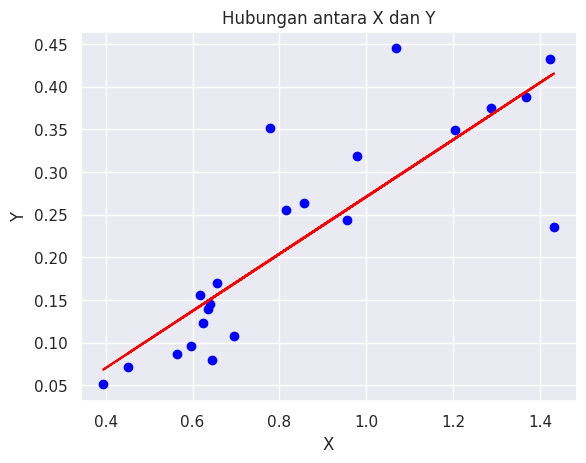

In [ ]:

# Menentukan variabel x dan y
x = np.array(df.drop(['sd_ale'], axis=1))
y = df['sd_ale'].values.reshape(-1, 1)

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Membuat model regresi linear
reg = LinearRegression()

# Melatih model dengan data latih
reg.fit(X_train, y_train)

# Memprediksi nilai y berdasarkan data uji
y_pred = reg.predict(X_test)

# Menghitung nilai R-squared
r2 = r2_score(y_test, y_pred)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Hubungan antara X dan Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Menampilkan r-squared

In [ ]:
print(r2)

0.7037722526621755


# Classification

Import library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load dataset
dataset = pd.read_csv("/content/yellow-small.data")
dataset = dataset.dropna()

df_encoded = pd.get_dummies(dataset, columns=['T', 'YELLOW', 'SMALL', 'STRETCH', 'ADULT'])
df_encoded = df_encoded.drop(['YELLOW_PURPLE', 'YELLOW_YELLOW', 'SMALL_LARGE', 'SMALL_SMALL'], axis=1)

# Pisahkan variabel independen (X) dan variabel dependen (y)
X = df_encoded.iloc[:, :-1].values
y = df_encoded.iloc[:, -1].values

# # Bagi dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Desicion Tree

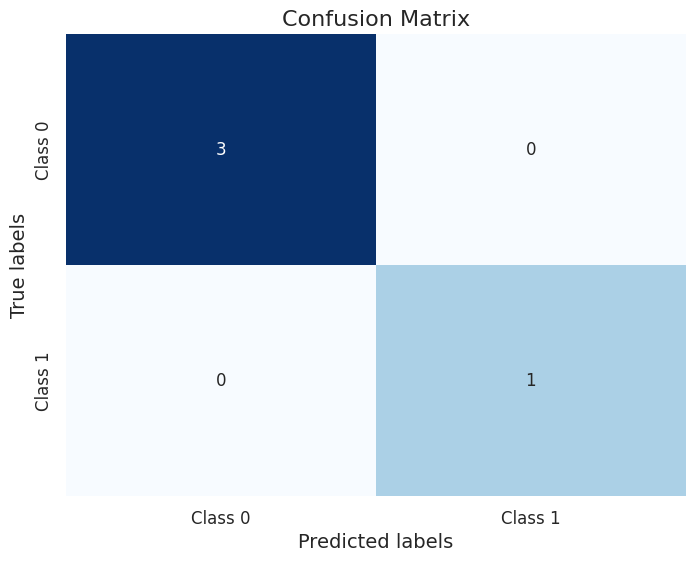


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
# Buat objek Decision Tree
clf = DecisionTreeClassifier()

# Training Decision Tree menggunakan train set
clf.fit(X_train, y_train)

# Prediksi nilai label pada test set
y_pred = clf.predict(X_test)

labels = ['Class 0', 'Class 1']
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
sns.set()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Menambahkan label dan judul
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels(labels, fontsize=12)
ax.set_title('Confusion Matrix', fontsize=16)
plt.show()

print("\nClassification report:\n", classification_report(y_test, y_pred))

### Naive Bayes

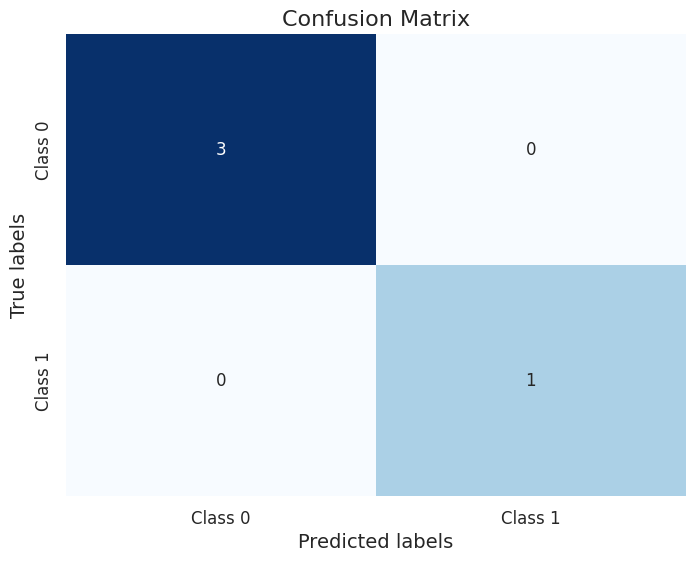


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
# Membuat dan latih model Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# prediksi menggunakan classifier yang dilatih menggunakan data train
y_pred = clf.predict(X_test)

# Evaluasi performa model menggunakan confusion matrix dan classification report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ['Class 0', 'Class 1']
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
sns.set()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Menambahkan label dan judul
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels(labels, fontsize=12)
ax.set_title('Confusion Matrix', fontsize=16)
plt.show()

print("\nClassification report:\n", classification_report(y_test, y_pred))

### KNN

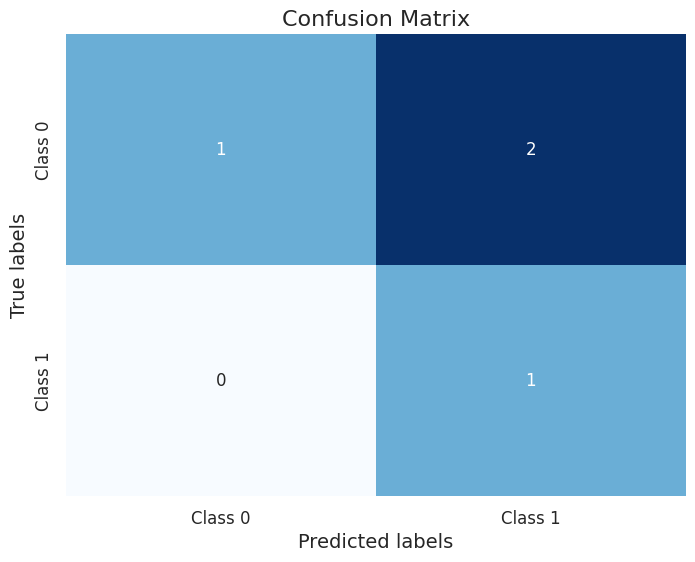


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [ ]:
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

# prediksi menggunakan classifier yang sudah dilatih
y_pred = clf.predict(X_test)


# Evaluasi performa model menggunakan confusion matrix dan classification report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ['Class 0', 'Class 1']
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
sns.set()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Menambahkan label dan judul
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels(labels, fontsize=12)
ax.set_title('Confusion Matrix', fontsize=16)
plt.show()

print("\nClassification report:\n", classification_report(y_test, y_pred))

# Clustering

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Wholesale customers data.csv')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


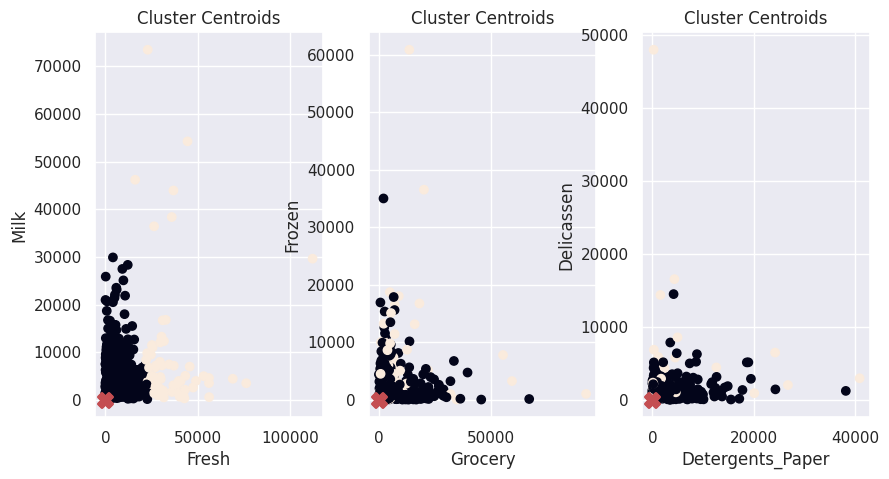

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Men-generate random 2D dataset
X = np.array(df)

# Membuat dan melatih model K-Means clustering dengan k=4
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# plot data points dengan warna yang berbeda untuk setiap cluster (Fresh dan Milk)
ax1.scatter(X[:, 2], X[:, 3], c=kmeans.labels_)
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, linewidths=2, c='r')
ax1.set_xlabel('Fresh')
ax1.set_ylabel('Milk')
ax1.set_title('Cluster Centroids')

# Grocery dan Frozen
ax2.scatter(X[:, 4], X[:, 5], c=kmeans.labels_)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, linewidths=2, c='r')
ax2.set_xlabel('Grocery')
ax2.set_ylabel('Frozen')
ax2.set_title('Cluster Centroids')

# Detergents_Paper dan Delicassen
ax3.scatter(X[:, 6], X[:, 7], c=kmeans.labels_)
ax3.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, linewidths=2, c='r')
ax3.set_xlabel('Detergents_Paper')
ax3.set_ylabel('Delicassen')
ax3.set_title('Cluster Centroids')

plt.show()